# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """4 10 7  6  3  7  8  7 4 7 10  7 3 9 3
       1  5 8 10 11  6  5  7 6 3  8  4 3 8 4
       10 6 8  7  8  7  7  7 4 6  7 10 4 4 0
       5  4 4  8  5  5 10  7 3 8  5  6 6 6 3
       5  7 8  5  7 10  9 10 8 2  3  6 9"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([ 4, 10,  7,  6,  3,  7,  8,  7,  4,  7, 10,  7,  3,  9,  3,  1,  5,
        8, 10, 11,  6,  5,  7,  6,  3,  8,  4,  3,  8,  4, 10,  6,  8,  7,
        8,  7,  7,  7,  4,  6,  7, 10,  4,  4,  0,  5,  4,  4,  8,  5,  5,
       10,  7,  3,  8,  5,  6,  6,  6,  3,  5,  7,  8,  5,  7, 10,  9, 10,
        8,  2,  3,  6,  9])

Сумма генеральної сукупності

In [2]:
an.sum()

453

In [3]:
sum(a)

453

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 8, 9, 8, 9, 14, 10, 3, 8, 1]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 2  1  8  9  8  9 14 10  3  9]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 8, 9, 8, 9, 14, 10, 3, 8, 1]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 1, 1: 1, 2: 1, 3: 8, 4: 9, 5: 8, 6: 9, 7: 14, 8: 10, 9: 3, 10: 8, 11: 1}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 8, 9, 8, 9, 14, 10, 3, 8, 1]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

7

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[7]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

7


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

6.0
6


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 8, 9, 8, 9, 14, 10, 3, 8, 1]
[0.014, 0.014, 0.014, 0.11, 0.123, 0.11, 0.123, 0.192, 0.137, 0.041, 0.11, 0.014]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 8, 9, 8, 9, 14, 10, 3, 8, 1]
[ 0.01369863  0.01369863  0.01369863  0.10958904  0.12328767  0.10958904
  0.12328767  0.19178082  0.1369863   0.04109589  0.10958904  0.01369863]


Гістограма та полігон абсолютних частот

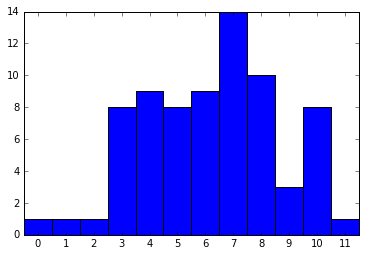

In [14]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

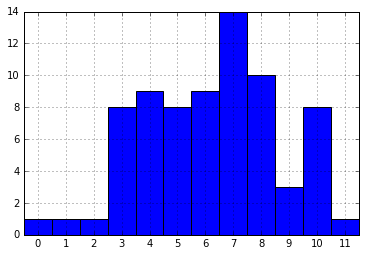

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

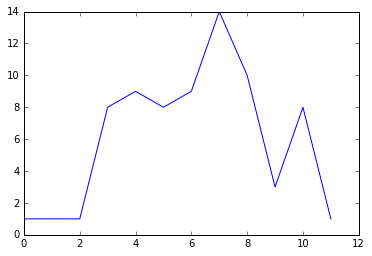

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

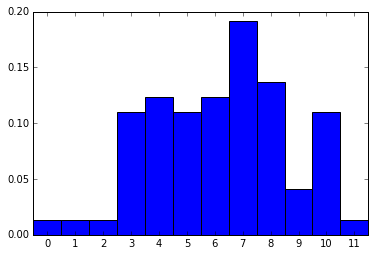

In [18]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

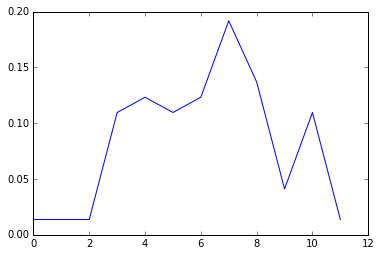

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

6.205479452054795
6.20547945205


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

5.8877473363774735
5.8877473363774735


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.9891161568774629

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

2.4097911244081742
2.409791124408174


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.388332786053


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.0136986301369863, 0.0136986301369863, 0.0136986301369863, 0.1095890410958904, 0.1232876712328767, 0.1095890410958904, 0.1232876712328767, 0.1917808219178082, 0.136986301369863, 0.0410958904109589, 0.1095890410958904, 0.0136986301369863]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.014,  0.027,  0.041,  0.151,  0.274,  0.384,  0.507,  0.699,
        0.836,  0.877,  0.986,  1.   ])

Складемо другу статистичну таблицю

In [28]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,1,0,0.014,0.014
1,1,1,0.014,0.027
2,1,2,0.014,0.041
3,8,3,0.110,0.151
4,9,4,0.123,0.274
5,8,5,0.110,0.384
6,9,6,0.123,0.507
7,14,7,0.192,0.699
8,10,8,0.137,0.836
9,3,9,0.041,0.877
